# Decision Tree for KickStarProject dataset

Goal: predict state

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
%store -r data

In [3]:
print(data.columns)
print(data.shape)
print(data.info())

Index(['category', 'main_category', 'currency', 'deadline', 'goal', 'launched',
       'pledged', 'state', 'backers', 'country', 'usd pledged',
       'usd_pledged_real', 'usd_goal_real', 'continent', 'days_launched',
       'launched_month'],
      dtype='object')
(5000, 16)
<class 'pandas.core.frame.DataFrame'>
Index: 5000 entries, 372978 to 378660
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   category          5000 non-null   object        
 1   main_category     5000 non-null   object        
 2   currency          5000 non-null   object        
 3   deadline          5000 non-null   datetime64[ns]
 4   goal              5000 non-null   float64       
 5   launched          5000 non-null   datetime64[ns]
 6   pledged           5000 non-null   float64       
 7   state             5000 non-null   int64         
 8   backers           5000 non-null   int64         
 9   country        

In [4]:
data_rn = data.copy()
data_rn.drop(['category','main_category','currency','deadline','goal','launched','country','continent','usd_goal_real','days_launched','launched_month'] ,axis=1,inplace=True)
data_rn.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5000 entries, 372978 to 378660
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   pledged           5000 non-null   float64
 1   state             5000 non-null   int64  
 2   backers           5000 non-null   int64  
 3   usd pledged       5000 non-null   float64
 4   usd_pledged_real  5000 non-null   float64
dtypes: float64(3), int64(2)
memory usage: 234.4 KB


In [5]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import confusion_matrix
from sklearn.metrics import recall_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.metrics import f1_score
from sklearn.metrics import fbeta_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error

def grafico_barras(data,atr,title,xlabel,ylabel):
    incidents_count = data[atr].value_counts()
    sns.set(style='darkgrid')
    sns.barplot(x=incidents_count.index, y=incidents_count.values)
    plt.title(title)
    plt.ylabel(ylabel)
    plt.xlabel(xlabel)
    plt.show()


X = data_rn.drop(['state'],axis=1)
y = data_rn['state'].to_frame()
random = 2021
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=random)

In [6]:
print("The shape of X %s. X_train has shape %s while X_test has shape %s" %(X.shape, X_train.shape, X_test.shape))
print("The shape of y %s. y_train has shape %s while y_test has shape %s" %(y.shape, y_train.shape, y_test.shape))

The shape of X (5000, 4). X_train has shape (3500, 4) while X_test has shape (1500, 4)
The shape of y (5000, 1). y_train has shape (3500, 1) while y_test has shape (1500, 1)


C:\Users\jmbar\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\jmbar\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\jmbar\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


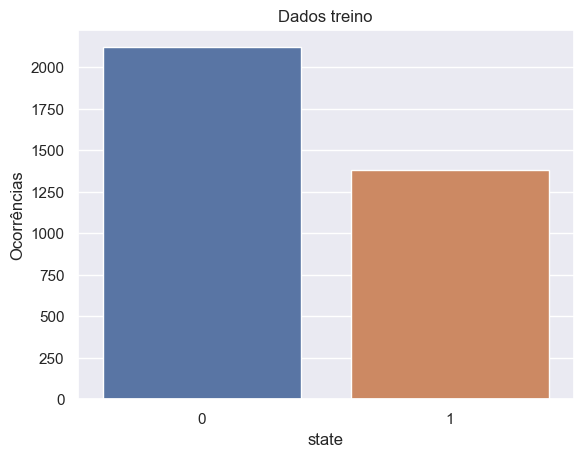

C:\Users\jmbar\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\jmbar\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\jmbar\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


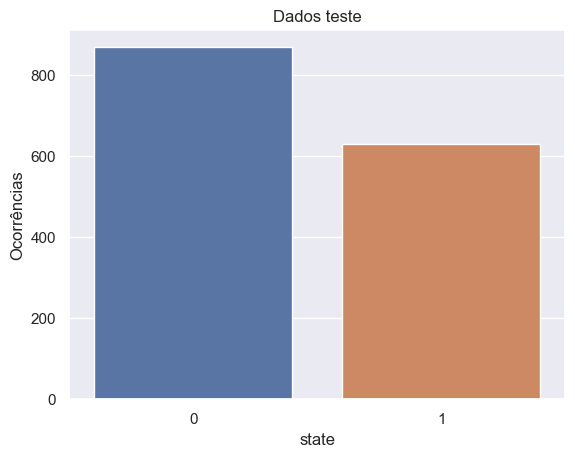

In [7]:
grafico_barras(y_train,'state','Dados treino','state','Ocorrências')
grafico_barras(y_test,'state','Dados teste','state','Ocorrências')

In [8]:
from sklearn.model_selection import GridSearchCV, KFold, train_test_split

In [9]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
from scikeras.wrappers import KerasClassifier

In [10]:
print("TensorFlow version:", tf.__version__)

TensorFlow version: 2.12.1


In [11]:
def build_model(activation='sigmoid', learning_rate=0.01):
    model = Sequential()
    model.add(Dense(16, input_dim=4, activation=activation))
    model.add(Dense(12, activation=activation))
    model.add(Dense(8, activation=activation))
    model.add(Dense(1, activation='sigmoid'))  # Output layer

    # Compile the model
    model.compile(
        loss='binary_crossentropy',
        optimizer=tf.optimizers.Adam(learning_rate),
        metrics=['accuracy', tf.keras.metrics.Precision(), tf.keras.metrics.Recall()]
    )
    return model

In [12]:
from sklearn.preprocessing import MinMaxScaler

scaler_x = MinMaxScaler(feature_range=(0,1)).fit(X)
X_scaled = pd.DataFrame(scaler_x.transform(X[X.columns]), columns = X.columns)

In [13]:
X.head()

,pledged,backers,usd pledged,usd_pledged_real
372978,125.0,2,125.0,125.0
372979,120.0,3,120.0,120.0
372980,0.0,0,0.0,0.0
372981,1502.0,12,1502.0,1502.0
372983,25.0,1,25.0,25.0


In [14]:
X_scaled.head()

,pledged,backers,usd pledged,usd_pledged_real
0,0.000040,0.000082,0.000040,0.000040
1,0.000038,0.000123,0.000038,0.000038
2,0.000000,0.000000,0.000000,0.000000
3,0.000480,0.000493,0.000480,0.000480
4,0.000008,0.000041,0.000008,0.000008


In [15]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled,y,test_size=0.2,random_state=2022)

In [16]:
optimizer = ['SGD', 'RMSprop', 'Adagrad']
param_grid = dict(optimizer = optimizer)

In [17]:
kf = KFold(n_splits = 5, shuffle = True, random_state = 2021)

In [18]:
build_model = build_model()
model = KerasClassifier(model = build_model, batch_size = 40, validation_split = 0.2, epochs = 60)

In [19]:
grid_search = GridSearchCV(estimator = model, param_grid = param_grid, cv = kf, scoring = 'accuracy',refit = 'True', verbose = 1,error_score='raise',)
grid_search.fit(X_train,y_train)

INFO:tensorflow:Assets written to: C:\Users\jmbar\AppData\Local\Temp\tmp5ibh5xpk\assets


INFO:tensorflow:Assets written to: C:\Users\jmbar\AppData\Local\Temp\tmp5ibh5xpk\assets


Fitting 5 folds for each of 3 candidates, totalling 15 fits


INFO:tensorflow:Assets written to: C:\Users\jmbar\AppData\Local\Temp\tmpu7oxwgar\assets


INFO:tensorflow:Assets written to: C:\Users\jmbar\AppData\Local\Temp\tmpu7oxwgar\assets


Epoch 1/60
64/64 [==============================] - 1s 7ms/step - loss: 0.6776 - accuracy: 0.5984 - precision: 0.0000e+00 - recall: 0.0000e+00 - val_loss: 0.6787 - val_accuracy: 0.5844 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00
Epoch 2/60
64/64 [==============================] - 0s 3ms/step - loss: 0.6759 - accuracy: 0.5984 - precision: 0.0000e+00 - recall: 0.0000e+00 - val_loss: 0.6784 - val_accuracy: 0.5844 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00
Epoch 3/60
64/64 [==============================] - 0s 2ms/step - loss: 0.6735 - accuracy: 0.5984 - precision: 0.0000e+00 - recall: 0.0000e+00 - val_loss: 0.6788 - val_accuracy: 0.5844 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00
Epoch 4/60
64/64 [==============================] - 0s 2ms/step - loss: 0.6740 - accuracy: 0.5984 - precision: 0.0000e+00 - recall: 0.0000e+00 - val_loss: 0.6831 - val_accuracy: 0.5844 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00
Epoch 5/60
64/64 [==============================

64/64 [==============================] - 0s 3ms/step - loss: 0.3857 - accuracy: 0.8316 - precision: 0.8074 - recall: 0.7626 - val_loss: 0.4049 - val_accuracy: 0.8297 - val_precision: 0.7962 - val_recall: 0.7932
Epoch 38/60
64/64 [==============================] - 0s 3ms/step - loss: 0.3836 - accuracy: 0.8313 - precision: 0.8085 - recall: 0.7597 - val_loss: 0.4042 - val_accuracy: 0.8266 - val_precision: 0.8063 - val_recall: 0.7669
Epoch 39/60
64/64 [==============================] - 0s 5ms/step - loss: 0.3833 - accuracy: 0.8316 - precision: 0.8087 - recall: 0.7607 - val_loss: 0.4069 - val_accuracy: 0.8250 - val_precision: 0.7831 - val_recall: 0.8008
Epoch 40/60
64/64 [==============================] - 0s 3ms/step - loss: 0.3863 - accuracy: 0.8363 - precision: 0.8079 - recall: 0.7772 - val_loss: 0.4037 - val_accuracy: 0.8297 - val_precision: 0.8127 - val_recall: 0.7669
Epoch 41/60
64/64 [==============================] - 0s 2ms/step - loss: 0.3861 - accuracy: 0.8410 - precision: 0.8178 -

INFO:tensorflow:Assets written to: C:\Users\jmbar\AppData\Local\Temp\tmpoj8v8wkq\assets


INFO:tensorflow:Assets written to: C:\Users\jmbar\AppData\Local\Temp\tmpoj8v8wkq\assets


Epoch 1/60
64/64 [==============================] - 1s 8ms/step - loss: 0.6815 - accuracy: 0.5895 - precision: 0.4750 - recall: 0.0729 - val_loss: 0.6782 - val_accuracy: 0.5859 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00
Epoch 2/60
64/64 [==============================] - 0s 2ms/step - loss: 0.6773 - accuracy: 0.5926 - precision: 0.0000e+00 - recall: 0.0000e+00 - val_loss: 0.6797 - val_accuracy: 0.5859 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00
Epoch 3/60
64/64 [==============================] - 0s 3ms/step - loss: 0.6792 - accuracy: 0.5926 - precision: 0.0000e+00 - recall: 0.0000e+00 - val_loss: 0.6779 - val_accuracy: 0.5859 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00
Epoch 4/60
64/64 [==============================] - 0s 3ms/step - loss: 0.6760 - accuracy: 0.5926 - precision: 0.0000e+00 - recall: 0.0000e+00 - val_loss: 0.6807 - val_accuracy: 0.5859 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00
Epoch 5/60
64/64 [==============================] - 0s 4

64/64 [==============================] - 0s 2ms/step - loss: 0.3852 - accuracy: 0.8297 - precision: 0.8056 - recall: 0.7670 - val_loss: 0.4306 - val_accuracy: 0.8172 - val_precision: 0.7643 - val_recall: 0.8075
Epoch 38/60
64/64 [==============================] - 0s 2ms/step - loss: 0.4103 - accuracy: 0.8293 - precision: 0.8030 - recall: 0.7699 - val_loss: 0.4076 - val_accuracy: 0.8172 - val_precision: 0.8033 - val_recall: 0.7396
Epoch 39/60
64/64 [==============================] - 0s 2ms/step - loss: 0.3880 - accuracy: 0.8285 - precision: 0.8063 - recall: 0.7622 - val_loss: 0.4102 - val_accuracy: 0.8125 - val_precision: 0.7778 - val_recall: 0.7660
Epoch 40/60
64/64 [==============================] - 0s 2ms/step - loss: 0.3830 - accuracy: 0.8316 - precision: 0.8091 - recall: 0.7680 - val_loss: 0.4050 - val_accuracy: 0.8172 - val_precision: 0.7937 - val_recall: 0.7547
Epoch 41/60
64/64 [==============================] - 0s 2ms/step - loss: 0.3831 - accuracy: 0.8313 - precision: 0.8058 -

INFO:tensorflow:Assets written to: C:\Users\jmbar\AppData\Local\Temp\tmp2sihfrmm\assets


INFO:tensorflow:Assets written to: C:\Users\jmbar\AppData\Local\Temp\tmp2sihfrmm\assets


Epoch 1/60
64/64 [==============================] - 1s 6ms/step - loss: 0.6783 - accuracy: 0.5895 - precision: 0.3625 - recall: 0.0282 - val_loss: 0.6798 - val_accuracy: 0.5813 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00
Epoch 2/60
64/64 [==============================] - 0s 2ms/step - loss: 0.6760 - accuracy: 0.5980 - precision: 0.0000e+00 - recall: 0.0000e+00 - val_loss: 0.6812 - val_accuracy: 0.5813 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00
Epoch 3/60
64/64 [==============================] - 0s 2ms/step - loss: 0.6761 - accuracy: 0.5980 - precision: 0.0000e+00 - recall: 0.0000e+00 - val_loss: 0.6802 - val_accuracy: 0.5813 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00
Epoch 4/60
64/64 [==============================] - 0s 2ms/step - loss: 0.6756 - accuracy: 0.5980 - precision: 0.0000e+00 - recall: 0.0000e+00 - val_loss: 0.6789 - val_accuracy: 0.5813 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00
Epoch 5/60
64/64 [==============================] - 0s 2

64/64 [==============================] - 0s 2ms/step - loss: 0.3923 - accuracy: 0.8301 - precision: 0.8126 - recall: 0.7502 - val_loss: 0.4129 - val_accuracy: 0.8109 - val_precision: 0.8075 - val_recall: 0.7201
Epoch 38/60
64/64 [==============================] - 0s 2ms/step - loss: 0.3869 - accuracy: 0.8316 - precision: 0.8141 - recall: 0.7532 - val_loss: 0.4435 - val_accuracy: 0.7828 - val_precision: 0.8086 - val_recall: 0.6306
Epoch 39/60
64/64 [==============================] - 0s 2ms/step - loss: 0.3920 - accuracy: 0.8344 - precision: 0.8168 - recall: 0.7580 - val_loss: 0.4148 - val_accuracy: 0.8203 - val_precision: 0.7865 - val_recall: 0.7836
Epoch 40/60
64/64 [==============================] - 0s 2ms/step - loss: 0.3932 - accuracy: 0.8324 - precision: 0.8067 - recall: 0.7668 - val_loss: 0.4099 - val_accuracy: 0.8125 - val_precision: 0.7846 - val_recall: 0.7612
Epoch 41/60
64/64 [==============================] - 0s 2ms/step - loss: 0.3814 - accuracy: 0.8332 - precision: 0.8116 -

INFO:tensorflow:Assets written to: C:\Users\jmbar\AppData\Local\Temp\tmpjmla18zs\assets


INFO:tensorflow:Assets written to: C:\Users\jmbar\AppData\Local\Temp\tmpjmla18zs\assets


Epoch 1/60
64/64 [==============================] - 1s 6ms/step - loss: 0.6725 - accuracy: 0.6047 - precision: 0.0000e+00 - recall: 0.0000e+00 - val_loss: 0.6893 - val_accuracy: 0.5594 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00
Epoch 2/60
64/64 [==============================] - 0s 2ms/step - loss: 0.6736 - accuracy: 0.6047 - precision: 0.0000e+00 - recall: 0.0000e+00 - val_loss: 0.6884 - val_accuracy: 0.5594 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00
Epoch 3/60
64/64 [==============================] - 0s 2ms/step - loss: 0.6730 - accuracy: 0.6047 - precision: 0.0000e+00 - recall: 0.0000e+00 - val_loss: 0.6891 - val_accuracy: 0.5594 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00
Epoch 4/60
64/64 [==============================] - 0s 2ms/step - loss: 0.6724 - accuracy: 0.6051 - precision: 1.0000 - recall: 9.8814e-04 - val_loss: 0.6904 - val_accuracy: 0.5594 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00
Epoch 5/60
64/64 [==============================] - 

64/64 [==============================] - 0s 2ms/step - loss: 0.3846 - accuracy: 0.8344 - precision: 0.8088 - recall: 0.7609 - val_loss: 0.4351 - val_accuracy: 0.7984 - val_precision: 0.8174 - val_recall: 0.6986
Epoch 38/60
64/64 [==============================] - 0s 2ms/step - loss: 0.3865 - accuracy: 0.8344 - precision: 0.8043 - recall: 0.7678 - val_loss: 0.4183 - val_accuracy: 0.8141 - val_precision: 0.8099 - val_recall: 0.7553
Epoch 39/60
64/64 [==============================] - 0s 2ms/step - loss: 0.3902 - accuracy: 0.8340 - precision: 0.8035 - recall: 0.7678 - val_loss: 0.4503 - val_accuracy: 0.7812 - val_precision: 0.8114 - val_recall: 0.6560
Epoch 40/60
64/64 [==============================] - 0s 2ms/step - loss: 0.3921 - accuracy: 0.8371 - precision: 0.8051 - recall: 0.7757 - val_loss: 0.4144 - val_accuracy: 0.8141 - val_precision: 0.7921 - val_recall: 0.7837
Epoch 41/60
64/64 [==============================] - 0s 2ms/step - loss: 0.3925 - accuracy: 0.8301 - precision: 0.7959 -

INFO:tensorflow:Assets written to: C:\Users\jmbar\AppData\Local\Temp\tmp4o6i2d1g\assets


INFO:tensorflow:Assets written to: C:\Users\jmbar\AppData\Local\Temp\tmp4o6i2d1g\assets


Epoch 1/60
64/64 [==============================] - 1s 6ms/step - loss: 0.6769 - accuracy: 0.5953 - precision: 0.0000e+00 - recall: 0.0000e+00 - val_loss: 0.6696 - val_accuracy: 0.6078 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00
Epoch 2/60
64/64 [==============================] - 0s 2ms/step - loss: 0.6765 - accuracy: 0.5957 - precision: 1.0000 - recall: 9.6525e-04 - val_loss: 0.6796 - val_accuracy: 0.6078 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00
Epoch 3/60
64/64 [==============================] - 0s 2ms/step - loss: 0.6770 - accuracy: 0.5953 - precision: 0.0000e+00 - recall: 0.0000e+00 - val_loss: 0.6728 - val_accuracy: 0.6078 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00
Epoch 4/60
64/64 [==============================] - 0s 2ms/step - loss: 0.6766 - accuracy: 0.5957 - precision: 1.0000 - recall: 9.6525e-04 - val_loss: 0.6695 - val_accuracy: 0.6078 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00
Epoch 5/60
64/64 [==============================] - 0s 2

64/64 [==============================] - 0s 2ms/step - loss: 0.4100 - accuracy: 0.8262 - precision: 0.8062 - recall: 0.7510 - val_loss: 0.4237 - val_accuracy: 0.8125 - val_precision: 0.7549 - val_recall: 0.7729
Epoch 38/60
64/64 [==============================] - 0s 2ms/step - loss: 0.3945 - accuracy: 0.8285 - precision: 0.8126 - recall: 0.7490 - val_loss: 0.4373 - val_accuracy: 0.7953 - val_precision: 0.7941 - val_recall: 0.6454
Epoch 39/60
64/64 [==============================] - 0s 2ms/step - loss: 0.3912 - accuracy: 0.8305 - precision: 0.8162 - recall: 0.7500 - val_loss: 0.4368 - val_accuracy: 0.7969 - val_precision: 0.7923 - val_recall: 0.6534
Epoch 40/60
64/64 [==============================] - 0s 2ms/step - loss: 0.3754 - accuracy: 0.8359 - precision: 0.8105 - recall: 0.7761 - val_loss: 0.4136 - val_accuracy: 0.8188 - val_precision: 0.7848 - val_recall: 0.7410
Epoch 41/60
64/64 [==============================] - 0s 2ms/step - loss: 0.3749 - accuracy: 0.8348 - precision: 0.8137 -

INFO:tensorflow:Assets written to: C:\Users\jmbar\AppData\Local\Temp\tmptuvtbh3f\assets


INFO:tensorflow:Assets written to: C:\Users\jmbar\AppData\Local\Temp\tmptuvtbh3f\assets


Epoch 1/60
64/64 [==============================] - 1s 6ms/step - loss: 0.6760 - accuracy: 0.5945 - precision: 0.4375 - recall: 0.0340 - val_loss: 0.6805 - val_accuracy: 0.5844 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00
Epoch 2/60
64/64 [==============================] - 0s 2ms/step - loss: 0.6765 - accuracy: 0.5984 - precision: 0.0000e+00 - recall: 0.0000e+00 - val_loss: 0.6790 - val_accuracy: 0.5844 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00
Epoch 3/60
64/64 [==============================] - 0s 2ms/step - loss: 0.6756 - accuracy: 0.5984 - precision: 0.0000e+00 - recall: 0.0000e+00 - val_loss: 0.6812 - val_accuracy: 0.5844 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00
Epoch 4/60
64/64 [==============================] - 0s 2ms/step - loss: 0.6761 - accuracy: 0.5984 - precision: 0.0000e+00 - recall: 0.0000e+00 - val_loss: 0.6798 - val_accuracy: 0.5859 - val_precision: 1.0000 - val_recall: 0.0038
Epoch 5/60
64/64 [==============================] - 0s 2ms/step 

64/64 [==============================] - 0s 3ms/step - loss: 0.3889 - accuracy: 0.8301 - precision: 0.8047 - recall: 0.7617 - val_loss: 0.4078 - val_accuracy: 0.8250 - val_precision: 0.7873 - val_recall: 0.7932
Epoch 38/60
64/64 [==============================] - 0s 2ms/step - loss: 0.3914 - accuracy: 0.8293 - precision: 0.8094 - recall: 0.7519 - val_loss: 0.4121 - val_accuracy: 0.8188 - val_precision: 0.8178 - val_recall: 0.7256
Epoch 39/60
64/64 [==============================] - 0s 2ms/step - loss: 0.3821 - accuracy: 0.8313 - precision: 0.8117 - recall: 0.7549 - val_loss: 0.4065 - val_accuracy: 0.8266 - val_precision: 0.7881 - val_recall: 0.7970
Epoch 40/60
64/64 [==============================] - 0s 2ms/step - loss: 0.3810 - accuracy: 0.8324 - precision: 0.8066 - recall: 0.7665 - val_loss: 0.4029 - val_accuracy: 0.8281 - val_precision: 0.7955 - val_recall: 0.7895
Epoch 41/60
64/64 [==============================] - 0s 2ms/step - loss: 0.3770 - accuracy: 0.8340 - precision: 0.8073 -

INFO:tensorflow:Assets written to: C:\Users\jmbar\AppData\Local\Temp\tmp4n94jb91\assets


INFO:tensorflow:Assets written to: C:\Users\jmbar\AppData\Local\Temp\tmp4n94jb91\assets


Epoch 1/60
64/64 [==============================] - 1s 7ms/step - loss: 0.6795 - accuracy: 0.5926 - precision: 0.0000e+00 - recall: 0.0000e+00 - val_loss: 0.6859 - val_accuracy: 0.5859 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00
Epoch 2/60
64/64 [==============================] - 0s 2ms/step - loss: 0.6814 - accuracy: 0.5926 - precision: 0.0000e+00 - recall: 0.0000e+00 - val_loss: 0.6790 - val_accuracy: 0.5859 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00
Epoch 3/60
64/64 [==============================] - 0s 3ms/step - loss: 0.6774 - accuracy: 0.5926 - precision: 0.0000e+00 - recall: 0.0000e+00 - val_loss: 0.6788 - val_accuracy: 0.5859 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00
Epoch 4/60
64/64 [==============================] - 0s 3ms/step - loss: 0.6759 - accuracy: 0.5926 - precision: 0.0000e+00 - recall: 0.0000e+00 - val_loss: 0.6775 - val_accuracy: 0.5859 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00
Epoch 5/60
64/64 [==============================

64/64 [==============================] - 0s 2ms/step - loss: 0.3837 - accuracy: 0.8332 - precision: 0.8124 - recall: 0.7680 - val_loss: 0.4170 - val_accuracy: 0.8094 - val_precision: 0.8095 - val_recall: 0.7057
Epoch 38/60
64/64 [==============================] - 0s 2ms/step - loss: 0.3883 - accuracy: 0.8316 - precision: 0.8085 - recall: 0.7689 - val_loss: 0.4146 - val_accuracy: 0.8172 - val_precision: 0.7782 - val_recall: 0.7811
Epoch 39/60
64/64 [==============================] - 0s 2ms/step - loss: 0.3891 - accuracy: 0.8313 - precision: 0.8083 - recall: 0.7680 - val_loss: 0.4075 - val_accuracy: 0.8188 - val_precision: 0.8066 - val_recall: 0.7396
Epoch 40/60
64/64 [==============================] - 0s 2ms/step - loss: 0.3834 - accuracy: 0.8316 - precision: 0.8097 - recall: 0.7670 - val_loss: 0.4151 - val_accuracy: 0.8203 - val_precision: 0.7778 - val_recall: 0.7925
Epoch 41/60
64/64 [==============================] - 0s 2ms/step - loss: 0.3831 - accuracy: 0.8305 - precision: 0.8085 -

INFO:tensorflow:Assets written to: C:\Users\jmbar\AppData\Local\Temp\tmp3jyv3wf2\assets


INFO:tensorflow:Assets written to: C:\Users\jmbar\AppData\Local\Temp\tmp3jyv3wf2\assets


Epoch 1/60
64/64 [==============================] - 1s 6ms/step - loss: 0.6760 - accuracy: 0.5980 - precision: 0.0000e+00 - recall: 0.0000e+00 - val_loss: 0.6804 - val_accuracy: 0.5813 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00
Epoch 2/60
64/64 [==============================] - 0s 2ms/step - loss: 0.6767 - accuracy: 0.5980 - precision: 0.0000e+00 - recall: 0.0000e+00 - val_loss: 0.6812 - val_accuracy: 0.5813 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00
Epoch 3/60
64/64 [==============================] - 0s 2ms/step - loss: 0.6735 - accuracy: 0.5980 - precision: 0.0000e+00 - recall: 0.0000e+00 - val_loss: 0.6865 - val_accuracy: 0.5813 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00
Epoch 4/60
64/64 [==============================] - 0s 2ms/step - loss: 0.6739 - accuracy: 0.5980 - precision: 0.0000e+00 - recall: 0.0000e+00 - val_loss: 0.6796 - val_accuracy: 0.5813 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00
Epoch 5/60
64/64 [==============================

64/64 [==============================] - 0s 2ms/step - loss: 0.3875 - accuracy: 0.8336 - precision: 0.8124 - recall: 0.7619 - val_loss: 0.4745 - val_accuracy: 0.7781 - val_precision: 0.8182 - val_recall: 0.6045
Epoch 38/60
64/64 [==============================] - 0s 2ms/step - loss: 0.3790 - accuracy: 0.8336 - precision: 0.8105 - recall: 0.7648 - val_loss: 0.4163 - val_accuracy: 0.8234 - val_precision: 0.7881 - val_recall: 0.7910
Epoch 39/60
64/64 [==============================] - 0s 2ms/step - loss: 0.3758 - accuracy: 0.8348 - precision: 0.8098 - recall: 0.7697 - val_loss: 0.4102 - val_accuracy: 0.8156 - val_precision: 0.8099 - val_recall: 0.7313
Epoch 40/60
64/64 [==============================] - 0s 2ms/step - loss: 0.3908 - accuracy: 0.8363 - precision: 0.8157 - recall: 0.7658 - val_loss: 0.4259 - val_accuracy: 0.8266 - val_precision: 0.7754 - val_recall: 0.8246
Epoch 41/60
64/64 [==============================] - 0s 2ms/step - loss: 0.3816 - accuracy: 0.8324 - precision: 0.8049 -

INFO:tensorflow:Assets written to: C:\Users\jmbar\AppData\Local\Temp\tmpk23y8naf\assets


INFO:tensorflow:Assets written to: C:\Users\jmbar\AppData\Local\Temp\tmpk23y8naf\assets


Epoch 1/60
64/64 [==============================] - 1s 6ms/step - loss: 0.6742 - accuracy: 0.6047 - precision: 0.0000e+00 - recall: 0.0000e+00 - val_loss: 0.6875 - val_accuracy: 0.5594 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00
Epoch 2/60
64/64 [==============================] - 0s 2ms/step - loss: 0.6722 - accuracy: 0.6047 - precision: 0.0000e+00 - recall: 0.0000e+00 - val_loss: 0.6885 - val_accuracy: 0.5594 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00
Epoch 3/60
64/64 [==============================] - 0s 2ms/step - loss: 0.6714 - accuracy: 0.6047 - precision: 0.0000e+00 - recall: 0.0000e+00 - val_loss: 0.6894 - val_accuracy: 0.5594 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00
Epoch 4/60
64/64 [==============================] - 0s 2ms/step - loss: 0.6716 - accuracy: 0.6047 - precision: 0.0000e+00 - recall: 0.0000e+00 - val_loss: 0.6851 - val_accuracy: 0.5594 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00
Epoch 5/60
64/64 [==============================

64/64 [==============================] - 0s 2ms/step - loss: 0.3887 - accuracy: 0.8305 - precision: 0.8036 - recall: 0.7559 - val_loss: 0.4361 - val_accuracy: 0.7969 - val_precision: 0.8193 - val_recall: 0.6915
Epoch 38/60
64/64 [==============================] - 0s 2ms/step - loss: 0.3841 - accuracy: 0.8332 - precision: 0.8037 - recall: 0.7648 - val_loss: 0.4172 - val_accuracy: 0.8141 - val_precision: 0.8099 - val_recall: 0.7553
Epoch 39/60
64/64 [==============================] - 0s 2ms/step - loss: 0.4124 - accuracy: 0.8285 - precision: 0.7963 - recall: 0.7609 - val_loss: 0.4429 - val_accuracy: 0.7844 - val_precision: 0.8130 - val_recall: 0.6631
Epoch 40/60
64/64 [==============================] - 0s 2ms/step - loss: 0.3826 - accuracy: 0.8352 - precision: 0.8079 - recall: 0.7648 - val_loss: 0.4271 - val_accuracy: 0.8047 - val_precision: 0.8178 - val_recall: 0.7163
Epoch 41/60
64/64 [==============================] - 0s 2ms/step - loss: 0.3804 - accuracy: 0.8359 - precision: 0.8027 -

INFO:tensorflow:Assets written to: C:\Users\jmbar\AppData\Local\Temp\tmpk9ci6mhi\assets


INFO:tensorflow:Assets written to: C:\Users\jmbar\AppData\Local\Temp\tmpk9ci6mhi\assets


Epoch 1/60
64/64 [==============================] - 1s 6ms/step - loss: 0.6789 - accuracy: 0.5867 - precision: 0.3625 - recall: 0.0280 - val_loss: 0.6729 - val_accuracy: 0.6078 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00
Epoch 2/60
64/64 [==============================] - 0s 2ms/step - loss: 0.6763 - accuracy: 0.5953 - precision: 0.0000e+00 - recall: 0.0000e+00 - val_loss: 0.6701 - val_accuracy: 0.6078 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00
Epoch 3/60
64/64 [==============================] - 0s 2ms/step - loss: 0.6750 - accuracy: 0.5953 - precision: 0.0000e+00 - recall: 0.0000e+00 - val_loss: 0.6717 - val_accuracy: 0.6078 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00
Epoch 4/60
64/64 [==============================] - 0s 2ms/step - loss: 0.6786 - accuracy: 0.5965 - precision: 1.0000 - recall: 0.0029 - val_loss: 0.6694 - val_accuracy: 0.6078 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00
Epoch 5/60
64/64 [==============================] - 0s 2ms/step 

64/64 [==============================] - 0s 2ms/step - loss: 0.3850 - accuracy: 0.8309 - precision: 0.8099 - recall: 0.7606 - val_loss: 0.4974 - val_accuracy: 0.7859 - val_precision: 0.8065 - val_recall: 0.5976
Epoch 38/60
64/64 [==============================] - 0s 2ms/step - loss: 0.3900 - accuracy: 0.8320 - precision: 0.8124 - recall: 0.7606 - val_loss: 0.4328 - val_accuracy: 0.7969 - val_precision: 0.7923 - val_recall: 0.6534
Epoch 39/60
64/64 [==============================] - 0s 2ms/step - loss: 0.3863 - accuracy: 0.8336 - precision: 0.8125 - recall: 0.7654 - val_loss: 0.4138 - val_accuracy: 0.8172 - val_precision: 0.7839 - val_recall: 0.7371
Epoch 40/60
64/64 [==============================] - 0s 2ms/step - loss: 0.3776 - accuracy: 0.8348 - precision: 0.8131 - recall: 0.7683 - val_loss: 0.4147 - val_accuracy: 0.8156 - val_precision: 0.7628 - val_recall: 0.7689
Epoch 41/60
64/64 [==============================] - 0s 2ms/step - loss: 0.3835 - accuracy: 0.8336 - precision: 0.8100 -

INFO:tensorflow:Assets written to: C:\Users\jmbar\AppData\Local\Temp\tmpqggyr3xr\assets


INFO:tensorflow:Assets written to: C:\Users\jmbar\AppData\Local\Temp\tmpqggyr3xr\assets


Epoch 1/60
64/64 [==============================] - 1s 6ms/step - loss: 0.6759 - accuracy: 0.5984 - precision: 0.0000e+00 - recall: 0.0000e+00 - val_loss: 0.6818 - val_accuracy: 0.5844 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00
Epoch 2/60
64/64 [==============================] - 0s 2ms/step - loss: 0.6753 - accuracy: 0.5984 - precision: 0.0000e+00 - recall: 0.0000e+00 - val_loss: 0.6807 - val_accuracy: 0.5844 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00
Epoch 3/60
64/64 [==============================] - 0s 2ms/step - loss: 0.6744 - accuracy: 0.5984 - precision: 0.0000e+00 - recall: 0.0000e+00 - val_loss: 0.6790 - val_accuracy: 0.5844 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00
Epoch 4/60
64/64 [==============================] - 0s 2ms/step - loss: 0.6735 - accuracy: 0.5984 - precision: 0.0000e+00 - recall: 0.0000e+00 - val_loss: 0.6780 - val_accuracy: 0.5844 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00
Epoch 5/60
64/64 [==============================

64/64 [==============================] - 0s 2ms/step - loss: 0.3846 - accuracy: 0.8359 - precision: 0.8180 - recall: 0.7607 - val_loss: 0.4072 - val_accuracy: 0.8250 - val_precision: 0.8105 - val_recall: 0.7556
Epoch 38/60
64/64 [==============================] - 0s 2ms/step - loss: 0.3869 - accuracy: 0.8359 - precision: 0.8108 - recall: 0.7714 - val_loss: 0.4302 - val_accuracy: 0.8031 - val_precision: 0.8182 - val_recall: 0.6767
Epoch 39/60
64/64 [==============================] - 0s 2ms/step - loss: 0.3798 - accuracy: 0.8328 - precision: 0.8112 - recall: 0.7607 - val_loss: 0.4080 - val_accuracy: 0.8266 - val_precision: 0.7860 - val_recall: 0.8008
Epoch 40/60
64/64 [==============================] - 0s 2ms/step - loss: 0.3820 - accuracy: 0.8336 - precision: 0.8078 - recall: 0.7685 - val_loss: 0.4079 - val_accuracy: 0.8250 - val_precision: 0.7831 - val_recall: 0.8008
Epoch 41/60
64/64 [==============================] - 0s 2ms/step - loss: 0.3860 - accuracy: 0.8336 - precision: 0.8071 -

INFO:tensorflow:Assets written to: C:\Users\jmbar\AppData\Local\Temp\tmpbaw_tj23\assets


INFO:tensorflow:Assets written to: C:\Users\jmbar\AppData\Local\Temp\tmpbaw_tj23\assets


Epoch 1/60
64/64 [==============================] - 1s 6ms/step - loss: 0.6774 - accuracy: 0.5801 - precision: 0.3000 - recall: 0.0230 - val_loss: 0.6789 - val_accuracy: 0.5859 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00
Epoch 2/60
64/64 [==============================] - 0s 2ms/step - loss: 0.6773 - accuracy: 0.5926 - precision: 0.0000e+00 - recall: 0.0000e+00 - val_loss: 0.6801 - val_accuracy: 0.5859 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00
Epoch 3/60
64/64 [==============================] - 0s 2ms/step - loss: 0.6801 - accuracy: 0.5820 - precision: 0.4335 - recall: 0.0844 - val_loss: 0.6781 - val_accuracy: 0.5859 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00
Epoch 4/60
64/64 [==============================] - 0s 2ms/step - loss: 0.6764 - accuracy: 0.5926 - precision: 0.0000e+00 - recall: 0.0000e+00 - val_loss: 0.6772 - val_accuracy: 0.5859 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00
Epoch 5/60
64/64 [==============================] - 0s 2ms/step 

64/64 [==============================] - 0s 2ms/step - loss: 0.3935 - accuracy: 0.8344 - precision: 0.8142 - recall: 0.7689 - val_loss: 0.4134 - val_accuracy: 0.8125 - val_precision: 0.7778 - val_recall: 0.7660
Epoch 38/60
64/64 [==============================] - 0s 2ms/step - loss: 0.3865 - accuracy: 0.8305 - precision: 0.8104 - recall: 0.7622 - val_loss: 0.4205 - val_accuracy: 0.8062 - val_precision: 0.8079 - val_recall: 0.6981
Epoch 39/60
64/64 [==============================] - 0s 2ms/step - loss: 0.3888 - accuracy: 0.8336 - precision: 0.8101 - recall: 0.7728 - val_loss: 0.4071 - val_accuracy: 0.8156 - val_precision: 0.7838 - val_recall: 0.7660
Epoch 40/60
64/64 [==============================] - 0s 2ms/step - loss: 0.3905 - accuracy: 0.8309 - precision: 0.8112 - recall: 0.7622 - val_loss: 0.4075 - val_accuracy: 0.8188 - val_precision: 0.8091 - val_recall: 0.7358
Epoch 41/60
64/64 [==============================] - 0s 2ms/step - loss: 0.3791 - accuracy: 0.8375 - precision: 0.8126 -

INFO:tensorflow:Assets written to: C:\Users\jmbar\AppData\Local\Temp\tmpydc1moca\assets


INFO:tensorflow:Assets written to: C:\Users\jmbar\AppData\Local\Temp\tmpydc1moca\assets


Epoch 1/60
64/64 [==============================] - 1s 6ms/step - loss: 0.6779 - accuracy: 0.5980 - precision: 0.0000e+00 - recall: 0.0000e+00 - val_loss: 0.6806 - val_accuracy: 0.5813 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00
Epoch 2/60
64/64 [==============================] - 0s 2ms/step - loss: 0.6743 - accuracy: 0.5980 - precision: 0.0000e+00 - recall: 0.0000e+00 - val_loss: 0.6796 - val_accuracy: 0.5813 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00
Epoch 3/60
64/64 [==============================] - 0s 3ms/step - loss: 0.6749 - accuracy: 0.5980 - precision: 0.0000e+00 - recall: 0.0000e+00 - val_loss: 0.6836 - val_accuracy: 0.5813 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00
Epoch 4/60
64/64 [==============================] - 0s 2ms/step - loss: 0.6746 - accuracy: 0.5980 - precision: 0.0000e+00 - recall: 0.0000e+00 - val_loss: 0.6798 - val_accuracy: 0.5813 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00
Epoch 5/60
64/64 [==============================

64/64 [==============================] - 0s 2ms/step - loss: 0.3841 - accuracy: 0.8297 - precision: 0.8092 - recall: 0.7541 - val_loss: 0.4919 - val_accuracy: 0.7734 - val_precision: 0.8154 - val_recall: 0.5933
Epoch 38/60
64/64 [==============================] - 0s 2ms/step - loss: 0.3890 - accuracy: 0.8316 - precision: 0.8128 - recall: 0.7551 - val_loss: 0.4551 - val_accuracy: 0.7812 - val_precision: 0.8107 - val_recall: 0.6231
Epoch 39/60
64/64 [==============================] - 0s 2ms/step - loss: 0.3855 - accuracy: 0.8297 - precision: 0.8060 - recall: 0.7590 - val_loss: 0.4149 - val_accuracy: 0.8109 - val_precision: 0.8155 - val_recall: 0.7090
Epoch 40/60
64/64 [==============================] - 0s 2ms/step - loss: 0.3785 - accuracy: 0.8348 - precision: 0.8124 - recall: 0.7658 - val_loss: 0.4091 - val_accuracy: 0.8141 - val_precision: 0.7992 - val_recall: 0.7425
Epoch 41/60
64/64 [==============================] - 0s 2ms/step - loss: 0.3969 - accuracy: 0.8375 - precision: 0.8176 -

INFO:tensorflow:Assets written to: C:\Users\jmbar\AppData\Local\Temp\tmpgw1upgsk\assets


INFO:tensorflow:Assets written to: C:\Users\jmbar\AppData\Local\Temp\tmpgw1upgsk\assets


Epoch 1/60
64/64 [==============================] - 1s 6ms/step - loss: 0.6745 - accuracy: 0.5953 - precision: 0.3500 - recall: 0.0277 - val_loss: 0.6969 - val_accuracy: 0.5594 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00
Epoch 2/60
64/64 [==============================] - 0s 2ms/step - loss: 0.6724 - accuracy: 0.6047 - precision: 0.0000e+00 - recall: 0.0000e+00 - val_loss: 0.6892 - val_accuracy: 0.5594 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00
Epoch 3/60
64/64 [==============================] - 0s 2ms/step - loss: 0.6719 - accuracy: 0.6047 - precision: 0.0000e+00 - recall: 0.0000e+00 - val_loss: 0.6990 - val_accuracy: 0.5594 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00
Epoch 4/60
64/64 [==============================] - 0s 2ms/step - loss: 0.6708 - accuracy: 0.6047 - precision: 0.0000e+00 - recall: 0.0000e+00 - val_loss: 0.6886 - val_accuracy: 0.5594 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00
Epoch 5/60
64/64 [==============================] - 0s 3

64/64 [==============================] - 0s 2ms/step - loss: 0.3927 - accuracy: 0.8332 - precision: 0.8025 - recall: 0.7668 - val_loss: 0.4157 - val_accuracy: 0.8141 - val_precision: 0.7921 - val_recall: 0.7837
Epoch 38/60
64/64 [==============================] - 0s 2ms/step - loss: 0.3961 - accuracy: 0.8320 - precision: 0.8019 - recall: 0.7638 - val_loss: 0.4249 - val_accuracy: 0.8203 - val_precision: 0.7811 - val_recall: 0.8227
Epoch 39/60
64/64 [==============================] - 0s 2ms/step - loss: 0.3857 - accuracy: 0.8273 - precision: 0.7938 - recall: 0.7609 - val_loss: 0.4403 - val_accuracy: 0.7953 - val_precision: 0.8186 - val_recall: 0.6879
Epoch 40/60
64/64 [==============================] - 0s 2ms/step - loss: 0.3948 - accuracy: 0.8352 - precision: 0.7980 - recall: 0.7806 - val_loss: 0.4731 - val_accuracy: 0.7781 - val_precision: 0.8153 - val_recall: 0.6418
Epoch 41/60
64/64 [==============================] - 0s 2ms/step - loss: 0.3990 - accuracy: 0.8270 - precision: 0.7936 -

INFO:tensorflow:Assets written to: C:\Users\jmbar\AppData\Local\Temp\tmpgeikh7z6\assets


INFO:tensorflow:Assets written to: C:\Users\jmbar\AppData\Local\Temp\tmpgeikh7z6\assets


Epoch 1/60
64/64 [==============================] - 1s 6ms/step - loss: 0.6765 - accuracy: 0.5953 - precision: 0.0000e+00 - recall: 0.0000e+00 - val_loss: 0.6695 - val_accuracy: 0.6078 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00
Epoch 2/60
64/64 [==============================] - 0s 2ms/step - loss: 0.6762 - accuracy: 0.5953 - precision: 0.0000e+00 - recall: 0.0000e+00 - val_loss: 0.6795 - val_accuracy: 0.6078 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00
Epoch 3/60
64/64 [==============================] - 0s 2ms/step - loss: 0.6765 - accuracy: 0.5957 - precision: 1.0000 - recall: 9.6525e-04 - val_loss: 0.6690 - val_accuracy: 0.6078 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00
Epoch 4/60
64/64 [==============================] - 0s 2ms/step - loss: 0.6755 - accuracy: 0.5953 - precision: 0.0000e+00 - recall: 0.0000e+00 - val_loss: 0.6695 - val_accuracy: 0.6078 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00
Epoch 5/60
64/64 [==============================] - 

64/64 [==============================] - 0s 2ms/step - loss: 0.3840 - accuracy: 0.8289 - precision: 0.8108 - recall: 0.7529 - val_loss: 0.4164 - val_accuracy: 0.8203 - val_precision: 0.7957 - val_recall: 0.7291
Epoch 38/60
64/64 [==============================] - 0s 2ms/step - loss: 0.3846 - accuracy: 0.8309 - precision: 0.8144 - recall: 0.7539 - val_loss: 0.4276 - val_accuracy: 0.8078 - val_precision: 0.7936 - val_recall: 0.6892
Epoch 39/60
64/64 [==============================] - 0s 2ms/step - loss: 0.4058 - accuracy: 0.8289 - precision: 0.8095 - recall: 0.7548 - val_loss: 0.4246 - val_accuracy: 0.8141 - val_precision: 0.7519 - val_recall: 0.7849
Epoch 40/60
64/64 [==============================] - 0s 2ms/step - loss: 0.3781 - accuracy: 0.8391 - precision: 0.8177 - recall: 0.7751 - val_loss: 0.4125 - val_accuracy: 0.8203 - val_precision: 0.7764 - val_recall: 0.7610
Epoch 41/60
64/64 [==============================] - 0s 2ms/step - loss: 0.3766 - accuracy: 0.8320 - precision: 0.8079 -

INFO:tensorflow:Assets written to: C:\Users\jmbar\AppData\Local\Temp\tmp1a2zupt0\assets


INFO:tensorflow:Assets written to: C:\Users\jmbar\AppData\Local\Temp\tmp1a2zupt0\assets


INFO:tensorflow:Assets written to: C:\Users\jmbar\AppData\Local\Temp\tmpclz97t9d\assets


INFO:tensorflow:Assets written to: C:\Users\jmbar\AppData\Local\Temp\tmpclz97t9d\assets


Epoch 1/60
80/80 [==============================] - 1s 5ms/step - loss: 0.6769 - accuracy: 0.5981 - precision: 1.0000 - recall: 7.7700e-04 - val_loss: 0.6815 - val_accuracy: 0.5838 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00
Epoch 2/60
80/80 [==============================] - 0s 2ms/step - loss: 0.6752 - accuracy: 0.5978 - precision: 0.0000e+00 - recall: 0.0000e+00 - val_loss: 0.6791 - val_accuracy: 0.5838 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00
Epoch 3/60
80/80 [==============================] - 0s 2ms/step - loss: 0.6765 - accuracy: 0.5978 - precision: 0.0000e+00 - recall: 0.0000e+00 - val_loss: 0.6801 - val_accuracy: 0.5838 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00
Epoch 4/60
80/80 [==============================] - 0s 2ms/step - loss: 0.6734 - accuracy: 0.5984 - precision: 1.0000 - recall: 0.0016 - val_loss: 0.6775 - val_accuracy: 0.5838 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00
Epoch 5/60
80/80 [==============================] - 0s 2ms/s

80/80 [==============================] - 0s 2ms/step - loss: 0.3962 - accuracy: 0.8338 - precision: 0.8022 - recall: 0.7786 - val_loss: 0.4063 - val_accuracy: 0.8188 - val_precision: 0.8013 - val_recall: 0.7508
Epoch 38/60
80/80 [==============================] - 0s 2ms/step - loss: 0.3803 - accuracy: 0.8359 - precision: 0.8073 - recall: 0.7778 - val_loss: 0.4388 - val_accuracy: 0.8025 - val_precision: 0.8114 - val_recall: 0.6847
Epoch 39/60
80/80 [==============================] - 0s 2ms/step - loss: 0.3849 - accuracy: 0.8331 - precision: 0.7981 - recall: 0.7832 - val_loss: 0.4132 - val_accuracy: 0.8188 - val_precision: 0.8133 - val_recall: 0.7327
Epoch 40/60
80/80 [==============================] - 0s 2ms/step - loss: 0.3814 - accuracy: 0.8331 - precision: 0.8014 - recall: 0.7778 - val_loss: 0.4034 - val_accuracy: 0.8188 - val_precision: 0.7781 - val_recall: 0.7898
Epoch 41/60
80/80 [==============================] - 0s 2ms/step - loss: 0.3761 - accuracy: 0.8381 - precision: 0.8040 -

GridSearchCV(cv=KFold(n_splits=5, random_state=2021, shuffle=True),
             error_score='raise',
             estimator=KerasClassifier(batch_size=40, epochs=60, model=<keras.engine.sequential.Sequential object at 0x000001D5C9A93F50>, validation_split=0.2),
             param_grid={'optimizer': ['SGD', 'RMSprop', 'Adagrad']},
             refit='True', scoring='accuracy', verbose=1)

In [20]:
print("Best: %f using %s" % (grid_search.best_score_,grid_search.best_params_))

Best: 0.833500 using {'optimizer': 'RMSprop'}


In [21]:
means = grid_search.cv_results_['mean_test_score']
stds = grid_search.cv_results_['std_test_score']
params = grid_search.cv_results_['params']

In [22]:
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with %r" %(mean, stdev,param))

0.829750 (0.009918) with {'optimizer': 'SGD'}
0.833500 (0.005327) with {'optimizer': 'RMSprop'}
0.829250 (0.003588) with {'optimizer': 'Adagrad'}


In [23]:
best_mlp_model = grid_search.best_estimator_

In [24]:
best_mlp_model.fit(X_train, y_train, epochs =100, validation_data = (X_test, y_test), verbose =1)

Epoch 1/100
100/100 [==============================] - 0s 4ms/step - loss: 0.3779 - accuracy: 0.8355 - precision: 0.7894 - recall: 0.8099 - val_loss: 0.4064 - val_accuracy: 0.8290 - val_precision: 0.7423 - val_recall: 0.8619
Epoch 2/100
100/100 [==============================] - 0s 2ms/step - loss: 0.3798 - accuracy: 0.8360 - precision: 0.7876 - recall: 0.8148 - val_loss: 0.4013 - val_accuracy: 0.8330 - val_precision: 0.8060 - val_recall: 0.7545
Epoch 3/100
100/100 [==============================] - 0s 2ms/step - loss: 0.3736 - accuracy: 0.8360 - precision: 0.7886 - recall: 0.8130 - val_loss: 0.3753 - val_accuracy: 0.8340 - val_precision: 0.7863 - val_recall: 0.7903
Epoch 4/100
100/100 [==============================] - 0s 2ms/step - loss: 0.3757 - accuracy: 0.8325 - precision: 0.7834 - recall: 0.8105 - val_loss: 0.3815 - val_accuracy: 0.8300 - val_precision: 0.7588 - val_recall: 0.8286
Epoch 5/100
100/100 [==============================] - 0s 2ms/step - loss: 0.3739 - accuracy: 0.8322

100/100 [==============================] - 0s 2ms/step - loss: 0.3617 - accuracy: 0.8370 - precision: 0.7772 - recall: 0.8377 - val_loss: 0.3666 - val_accuracy: 0.8360 - val_precision: 0.7775 - val_recall: 0.8133
Epoch 38/100
100/100 [==============================] - 0s 2ms/step - loss: 0.3631 - accuracy: 0.8397 - precision: 0.7761 - recall: 0.8494 - val_loss: 0.3692 - val_accuracy: 0.8360 - val_precision: 0.7802 - val_recall: 0.8082
Epoch 39/100
100/100 [==============================] - 0s 2ms/step - loss: 0.3650 - accuracy: 0.8413 - precision: 0.7784 - recall: 0.8500 - val_loss: 0.3644 - val_accuracy: 0.8310 - val_precision: 0.7681 - val_recall: 0.8133
Epoch 40/100
100/100 [==============================] - 0s 2ms/step - loss: 0.3619 - accuracy: 0.8397 - precision: 0.7780 - recall: 0.8457 - val_loss: 0.3707 - val_accuracy: 0.8300 - val_precision: 0.7450 - val_recall: 0.8593
Epoch 41/100
100/100 [==============================] - 0s 2ms/step - loss: 0.3640 - accuracy: 0.8382 - preci

100/100 [==============================] - 0s 2ms/step - loss: 0.3604 - accuracy: 0.8415 - precision: 0.7745 - recall: 0.8586 - val_loss: 0.3602 - val_accuracy: 0.8360 - val_precision: 0.7709 - val_recall: 0.8261
Epoch 74/100
100/100 [==============================] - 0s 2ms/step - loss: 0.3690 - accuracy: 0.8372 - precision: 0.7690 - recall: 0.8549 - val_loss: 0.3571 - val_accuracy: 0.8320 - val_precision: 0.7611 - val_recall: 0.8312
Epoch 75/100
100/100 [==============================] - 0s 2ms/step - loss: 0.3579 - accuracy: 0.8395 - precision: 0.7750 - recall: 0.8506 - val_loss: 0.3845 - val_accuracy: 0.8280 - val_precision: 0.7267 - val_recall: 0.8977
Epoch 76/100
100/100 [==============================] - 0s 2ms/step - loss: 0.3584 - accuracy: 0.8415 - precision: 0.7748 - recall: 0.8580 - val_loss: 0.3890 - val_accuracy: 0.8280 - val_precision: 0.7230 - val_recall: 0.9079
Epoch 77/100
100/100 [==============================] - 0s 2ms/step - loss: 0.3582 - accuracy: 0.8393 - preci

KerasClassifier(
	model=<keras.engine.sequential.Sequential object at 0x000001D5CC0D1590>
	build_fn=None
	warm_start=False
	random_state=None
	optimizer=RMSprop
	loss=None
	metrics=None
	batch_size=40
	validation_batch_size=None
	verbose=1
	callbacks=None
	validation_split=0.2
	shuffle=True
	run_eagerly=False
	epochs=60
	class_weight=None
)

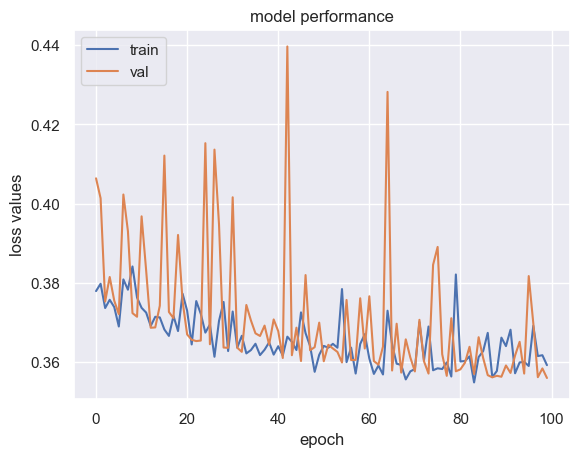

In [25]:
plt.plot(best_mlp_model.history_['loss'])
plt.plot(best_mlp_model.history_['val_loss'])
plt.title('model performance')
plt.ylabel('loss values')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

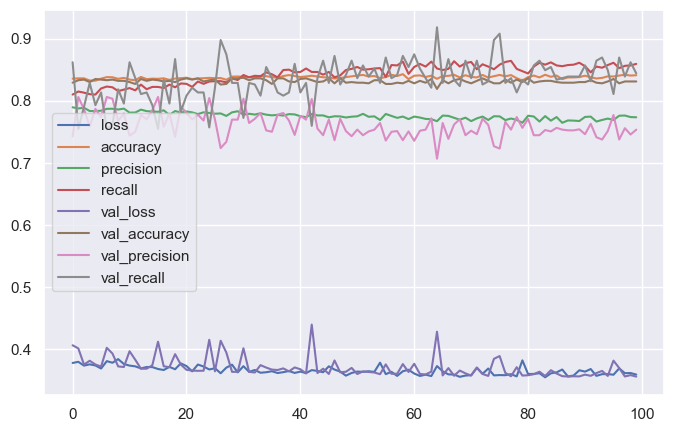

In [26]:
pd.DataFrame(best_mlp_model.history_).plot(figsize=(8,5))
plt.show()

In [27]:
prediction = best_mlp_model.predict(X_test)

25/25 [==============================] - 0s 1ms/step


In [28]:
from sklearn import metrics

In [29]:
accuracy = metrics.accuracy_score(y_test, prediction)
precision = metrics.precision_score(y_test, prediction)
recall = metrics.recall_score(y_test, prediction)

print('Accuracy: ', accuracy)
print('Precision: ', precision)
print('Recall: ', recall)

Accuracy:  0.831
Precision:  0.7534246575342466
Recall:  0.8439897698209718


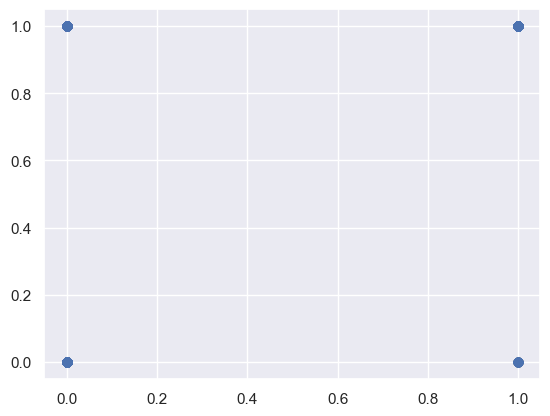

In [30]:
plt.scatter(y_test,prediction)

In [31]:
def real_predicted_viz(limit):
    plt.figure(figsize=(14,6))
    plt.plot(y_test[:limit],color='green',label='Actual')
    plt.plot(prediction[:limit],color='red',label='Predicted')
    plt.grid(alpha=0.3)
    
    plt.title('Real x Predicted')
    plt.legend()
    plt.show()

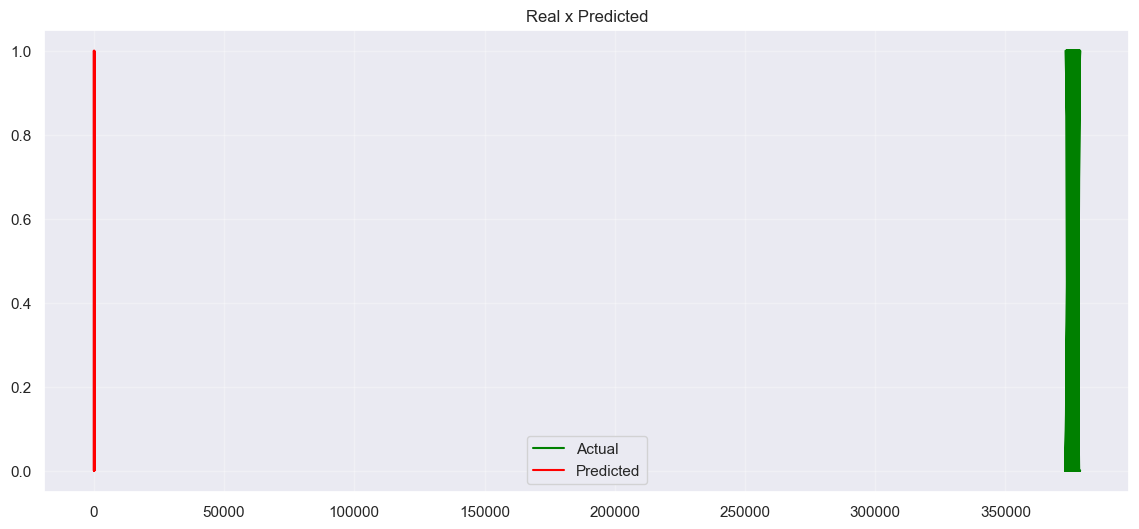

In [32]:
real_predicted_viz(200)

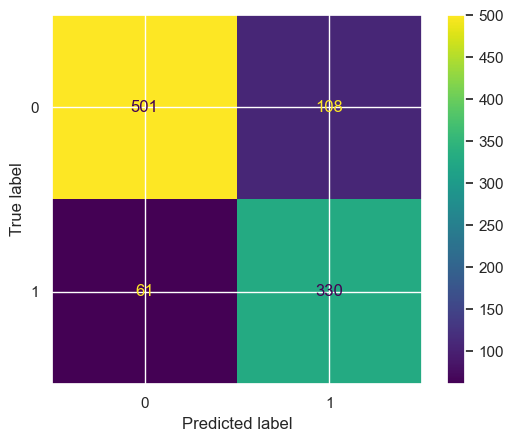

In [33]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
ConfusionMatrixDisplay.from_predictions(y_test,prediction)

plt.show()